## CSE 377 HW 9 - Image Registration

### Given a source image and a target image, manually select N points in the source image (x_n, y_n) and the corresponding N points in the target image (x' n, y' n). n = 1, ..., N and N >= 4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
# Saving the source image and target image to src_arr and trg_arr, respectively. Will deal with these numpy 
# arrays to get results later on.

img_src = PIL.Image.open('Source.png')
img_trg = PIL.Image.open('Target.png')
src_arr = np.array(img_src)
trg_arr = np.array(img_trg)

# We can notice that the shape of the images are slightly off, which may cause trouble later on.

print('The shape of src image:', src_arr.shape)
print('The shape of trg image:', trg_arr.shape)

The shape of src image: (314, 317, 3)
The shape of trg image: (317, 317, 4)


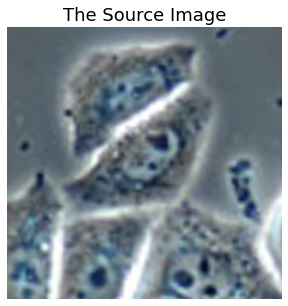

In [3]:
# Displaying the Source image to the user

fig, ax = plt.subplots(figsize=(5,5))
plt.title('The Source Image', size=18)
plt.axis('off')
ax.imshow(src_arr)
plt.show()

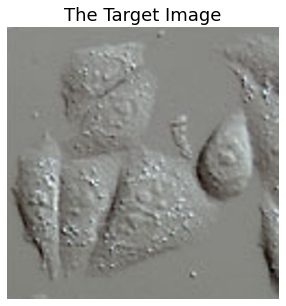

In [4]:
# Displaying the Target image to the user

fig, ax = plt.subplots(figsize=(5,5))
plt.title('The Target Image', size=18)
plt.axis('off')
ax.imshow(trg_arr)
plt.show()

In [5]:
# The coordinates in the source image (x_n, y_n) that I manually selected.

src_coords = np.array([
    [102, 33],
    [75, 145],
    [190, 200],
    [240, 85]
])

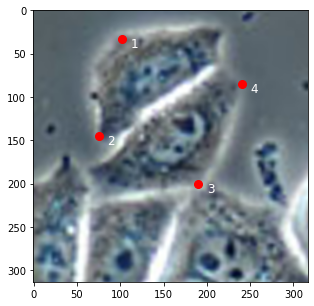

In [6]:
# Displaying these coordinates in the source image to get a clearer visualization.

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(src_arr)
for i, (x, y) in enumerate(src_coords):
    ax.plot(x, y, 'o', markersize=8, color='red')
    ax.text(x+10, y+10, f'{i+1}', color='white', fontsize=12)
plt.show()


In [7]:
# The coordinates in the target image (x'_n, y'_n) that I manually chose.
# These roughly correspond to the placements from the source image.

trg_coords = np.array([
    [73, 30],
    [75, 115],
    [155, 136],
    [175, 72]
])

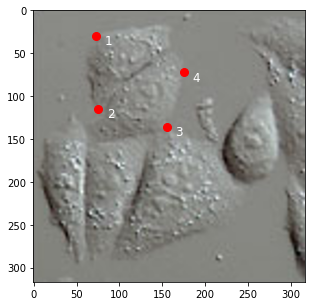

In [8]:
# Displaying these coordinates in the target image to get a clearer visualization.

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(trg_arr)
for i, (x, y) in enumerate(trg_coords):
    ax.plot(x, y, 'o', markersize=8, color='red')
    ax.text(x+10, y+10, f'{i+1}', color='white', fontsize=12)
plt.show()


### Task 01 

Assume that h_3,3 = 1, estimate the homography transformation matrix h, a 3x3 array, from the source to the target image coordinates by formulating the following linear equation systems...

Denote the above linear equation system as Ah=b, solve h by pseudo-inverse h=(A^T A)^-1 (A^T b).

In [9]:
# This is for task 01.

# Initializing the arrays for A and b

A = []
b = []

# Adding values to the arrays A and b according to the linear equation systems provided in the document.

for i in range(4):
    x, y = src_coords[i]
    u, v = trg_coords[i]
    A.append([x, y, 1, 0, 0, 0, -u*x, -u*y])
    A.append([0, 0, 0, x, y, 1, -v*x, -v*y])
    b.append([u])
    b.append([v])
A = np.asarray(A)
b = np.asarray(b)

# Solving for h_1 using pseudo-inverse approach.

h_1 = np.linalg.inv(A.T @ A) @ A.T @ b

# result is a 8x1 array but we want 9 values so we append the extra h_3,3 = 1.

h_1 = np.append(h_1,1)

# reshape the 9x1 array into 3x3. this will be h from the first part, which is due to pseudo-inverse.

h_1 = np.reshape(h_1, (3,3))
print(h_1)


[[ 1.40862709e+00  4.98389405e-01 -6.23023465e+01]
 [ 1.79674720e-01  1.26714116e+00 -1.99406440e+01]
 [ 2.55298150e-03  2.41385085e-03  1.00000000e+00]]


### Task 02

Without assuming h_3,3 = 1, estimate the homography transformation matrix from the source to the target image coordinates by formulating the following homogeneous equation systems...

Denote the above homogeneous equation systems as Ah=0, solve h by eigen decomposition (eig) as discussed in class. Denote the solution as h_eig.

In [10]:
# Create array for A in the Ah=0.

A = []

# filling in the values as mentioned in the equation systems

for i in range(4):
    x, y = src_coords[i]
    u, v = trg_coords[i]
    A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
    A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])

# the b array is a 2(4)x1 array so its 8x1 of zeros.

b = np.zeros(8)
A = np.asarray(A)

# compute A.T @ A and eigen decomposition

ATA = A.T @ A
eigenvalues, eigenvectors = np.linalg.eig(ATA)

# find the eigenvector corresponding to the smallest eigenvalue

min_eig_idx = np.argmin(eigenvalues)
h = eigenvectors[:, min_eig_idx]

# reshape the flattened h vector to a 3x3 matrix

h_eig = np.reshape(h, (3, 3))

# Display the resulting matrix of h_eig.

print(h_eig)

[[-2.15212324e-02 -7.61447391e-03  9.51865322e-01]
 [-2.74509942e-03 -1.93595875e-02  3.04656383e-01]
 [-3.90048640e-05 -3.68792035e-05 -1.52781617e-02]]


### Task 03

Using the same A matrix in part 2, solve h by singular value decomposition (svd) as discussed in class. Denote the solution as h_svd.

In [11]:
# Solve for h using singular value decomposition (svd)

U, S, Vt = np.linalg.svd(A)
h_svd = Vt[-1, :]

# Reshape h_svd into a 3x3 matrix

h_svd = np.reshape(h_svd, (3, 3))

# Display the resulting matrix of h_svd.

print(h_svd)

[[-2.15212324e-02 -7.61447390e-03  9.51865321e-01]
 [-2.74509942e-03 -1.93595875e-02  3.04656383e-01]
 [-3.90048640e-05 -3.68792035e-05 -1.52781616e-02]]


### Task 04 

Compare h, h_eig, and h_svd.

Check if h_eig is identical to h_svd.

In [12]:
# Displaying the matrix h to the user.

print(h_1)

[[ 1.40862709e+00  4.98389405e-01 -6.23023465e+01]
 [ 1.79674720e-01  1.26714116e+00 -1.99406440e+01]
 [ 2.55298150e-03  2.41385085e-03  1.00000000e+00]]


In [13]:
# Displaying the matrix h_eig to the user.

print(h_eig)

[[-2.15212324e-02 -7.61447391e-03  9.51865322e-01]
 [-2.74509942e-03 -1.93595875e-02  3.04656383e-01]
 [-3.90048640e-05 -3.68792035e-05 -1.52781617e-02]]


In [14]:
# Displaying the matrix h_svd to the user.

print(h_svd)

[[-2.15212324e-02 -7.61447390e-03  9.51865321e-01]
 [-2.74509942e-03 -1.93595875e-02  3.04656383e-01]
 [-3.90048640e-05 -3.68792035e-05 -1.52781616e-02]]


### h_eig appears to be nearly identical with respects to h_svd. There are some values that are many decimal places away in difference. For example, h_eig(0,1) = -7.6144739(1)e-03 while h_svd(0,1) = -7.6144739(0)e-03. The difference is hardly noticable.

In [15]:
# Dividing h_eig by its last element.

h_eig = h_eig / h_eig[2,2]

# Displaying the matrix h_eig after normalizing to the user.

print(h_eig)

[[ 1.40862709e+00  4.98389405e-01 -6.23023465e+01]
 [ 1.79674720e-01  1.26714116e+00 -1.99406440e+01]
 [ 2.55298149e-03  2.41385085e-03  1.00000000e+00]]


In [16]:
# Dividing h_svd by its last element.

h_svd = h_svd / h_svd[2,2]

# Displaying the matrix h_svd after normalizing to the user.

print(h_svd)

[[ 1.40862709e+00  4.98389405e-01 -6.23023465e+01]
 [ 1.79674720e-01  1.26714116e+00 -1.99406440e+01]
 [ 2.55298150e-03  2.41385085e-03  1.00000000e+00]]


In [17]:
print(h_1)

[[ 1.40862709e+00  4.98389405e-01 -6.23023465e+01]
 [ 1.79674720e-01  1.26714116e+00 -1.99406440e+01]
 [ 2.55298150e-03  2.41385085e-03  1.00000000e+00]]


### From first glance, the first 8 elements of both the new h_eig and h_svd appear to be the same as the h from part 1, but printing equality says they aren't equal. But from the visible digits available, I would say that they're equal.

### Task 05 

Implement the forward warping to warp the source image to the target image coordinate, using the estimate h or h_eig or h_svd.

In [18]:
# create a target array of zeros with the given size

w_arr = np.zeros((trg_arr.shape[1], trg_arr.shape[0], src_arr.shape[2]), dtype=np.uint8)

# invert the homography matrix, I chose to use the h_eig for this step.

h_inv = np.linalg.inv(h_eig)

# loop over the target image


for y in range(w_arr.shape[0]):
    for x in range(w_arr.shape[1]):
        # transform the target pixel coordinates to source coordinates using the homography matrix
        src_x, src_y, src_z = np.dot(h_inv, np.array([x, y, 1]))
        src_x_norm = src_x / src_z
        src_y_norm = src_y / src_z

        # round the normalized coordinates to the nearest integer values
        src_x_int = int(np.round(src_x_norm))
        src_y_int = int(np.round(src_y_norm))

        # check if the transformed pixel is inside the bounds of the source image
        if (src_x_int >= 0) and (src_x_int < src_arr.shape[1]) and (src_y_int >= 0) and (src_y_int < src_arr.shape[0]):
            # copy the color of the source pixel to the corresponding pixel in the target image
            w_arr[y, x] = src_arr[src_y_int, src_x_int]


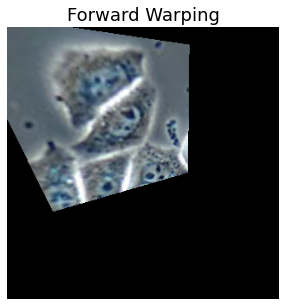

In [19]:
# Displaying the foward warped image back to the user.

fig, ax = plt.subplots(figsize=(5,5))
plt.title('Forward Warping', size=18)
plt.axis('off')
ax.imshow(w_arr)
plt.show()

### Task 06

Implement the backward warping to warp the source image to the target image coordinate, using the estimated h or h_eig or h_svd. 

In [20]:
# create array of zeros

w_arr = np.zeros((trg_arr.shape[1], trg_arr.shape[0], src_arr.shape[2]), dtype=np.uint8)

# invert matrix, I chose to use the h_svd for this step.

h_inv = np.linalg.inv(h_svd)

for y_tgt in range(trg_arr.shape[1]):
    for x_tgt in range(trg_arr.shape[0]):
        # transform the target coordinates to source coordinates.
        
        p_tgt = np.array([x_tgt, y_tgt, 1])
        p_src = h_inv @ p_tgt
        x_src, y_src = p_src[0]/p_src[2], p_src[1]/p_src[2]

        # round the coordinates and convert to integers.
        
        x_src_int = int(np.round(x_src))
        y_src_int = int(np.round(y_src))

        # bound checking to make sure the new value is within acceptable bounds.
        
        if (x_src_int >= 0) and (x_src_int < src_arr.shape[1]) and (y_src_int >= 0) and (y_src_int < src_arr.shape[0]):
            
            # adding the new color to the warped image array
            
            w_arr[y_tgt, x_tgt] = src_arr[y_src_int, x_src_int]


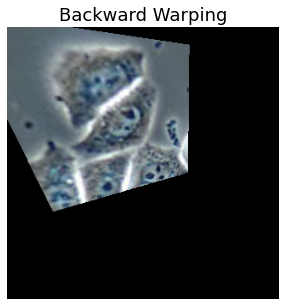

In [21]:
# Displaying the Backward Warped image to the user.

fig, ax = plt.subplots(figsize=(5,5))
plt.title('Backward Warping', size=18)
plt.axis('off')
ax.imshow(w_arr)
plt.show()

# Image appears to be the same result as the forward warped image.